# Projet d'optmisation :
## Phase 3: FITTER UN NUAGE DE POINTS PAR UNE HQ : PROBLEME COMPLET

Dans cette phase finale on introduit une fonction inside_outside : 

$$F_{i o}(x, y, \lambda)=\varphi(x, y, \lambda)^{\frac{1}{4}}=\left[\sum_{k=1}^{N h}\left|A_{k} \cdot x+B_{k} \cdot y+C_{k}\right|^{4}\right]^{\frac{1}{4}}$$

Puis on définit l'erreur de fit ${EoF}_{1}(\lambda)$   :

$$
\operatorname{EoF}_{1}(\lambda)=\frac{1}{2} \sum_{i=1}^{N}\left[1-F_{i o_{-} i}(\lambda)\right]^{2}
$$

Pour limiter le domaine de recherche des paramétres on ajoute des termes de pénalité dans le critére à minimiser : 

$$
\begin{array}{l}
\operatorname{EoF}(\lambda)=\frac{1}{2} \sum_{i=1}^{N}\left(\frac{1-F_{i o}\left(x_{i} y_{b} \lambda\right)}{\left\|\nabla F_{l o}\left(x_{i} y_{l}, \lambda\right)\right\|}\right)^{2}+v \cdot \sum_{k=1}^{N_{h}} P_{k}(\lambda) \\
\text { Où } P_{k}(\lambda)=\left(\max \left(0, \mu_{1}-\left(A_{k}^{2}+B_{k}^{2}\right)\right)\right)^{2}+\left(\max \left(0,\left(A_{k}^{2}+B_{k}^{2}\right)-\mu_{2}\right)\right)^{2}
\end{array}
$$

avec 
$
\mu_{1}=\left(\frac{2}{k_{1}-s_{\max }}\right)^{2} \text { et } \mu_{2}=\left(\frac{2}{k_{2}-s_{\min }}\right)^{2}
$ et $k_{1}=k_{2}=10$ et $v=10^{8}$


Avant de commencer à implémenter l'algorithme de minimisation, nous devons calculer le gradient et la matrice hessienne et définir les fonctions python qui renverront les matrices de ces derniers outils.  

### Calcul du gradient de $J(\lambda)$ : 

On sait que $\lambda = [A_{1}, B_{1}, C_{1},...,A_{Nh}, B_{Nh}, C_{Nh}]$

Le gradient sera donc de la forme : 

$$
\nabla J(\lambda)=\left[\begin{array}{c}
\frac{\partial J(\lambda)}{\partial A_{1}} \\
\vdots \\
\frac{\partial J(\lambda)}{\partial C_{Nh}}
\end{array}\right]
$$

Pour estimer le gradient, nous devrons calculer toutes les dérivées partielles :

On rapelle que $J(\lambda)=\frac{1}{2} \sum_{i=1}^{N} w_{i}\left(1-F_{i o}\left(x_{i}, y_{i}, \lambda\right)\right)^{2}+v \cdot \sum_{k=1}^{N_{h}} P_{k}(\lambda)$ où  $w_{i}=\frac{1}{\left\|\nabla F_{i o}\left(x_{i}, y_{i}, \lambda\right)\right\|^{2}}$

* $\frac{\partial J(\lambda)}{\partial A_{j}} = \sum_{i=1}^{N} w_{i} (1-F_{i o}(x_{i}, y_{i}, \lambda))\frac{\partial F_{i o}(x_{i}, y_{i}, \lambda) }{\partial A_{j}} + \sum_{k=1}^{N_{h}} \frac{\partial P_{k}(\lambda) }{\partial A_{j}}$ 

    On sait déja que $\frac{\partial P_{k}(\lambda) }{\partial A_{j}}$ = $4 A_{j} \cdot\left[-\max \left(0, \mu_{1}-\left(A_{j}^{2}+B_{j}^{2}\right)\right)+\max \left(0,\left(A_{j}^{2}+B_{j}^{2}\right)-\mu_{2}\right)\right]$

    Et on calcule que : 

    $\frac{\partial F_{i o}(x_{i}, y_{i}, \lambda) }{\partial A_{j}} = x_{i}(A_{j} x + B_{j}y + C_{j})^3 \left[\sum_{k=1}^{N h}\left|A_{k} \cdot x+B_{k} \cdot y+C_{k}\right|^{4}\right]^{- \frac{3}{4}}$

* $\frac{\partial J(\lambda)}{\partial B_{j}} = \sum_{i=1}^{N} w_{i} (1-F_{i o}(x_{i}, y_{i}, \lambda))\frac{\partial F_{i o}(x_{i}, y_{i}, \lambda) }{\partial B_{j}} + \sum_{k=1}^{N_{h}} \frac{\partial P_{k}(\lambda) }{\partial B_{j}}$ 

    On sait déja que : 

    $\frac{\partial P_{k}}{\partial B_{k}}(\lambda)=4 B_{k} \cdot\left[-\max \left(0, \mu_{1}-\left(A_{k}^{2}+B_{k}^{2}\right)\right)+\max \left(0,\left(A_{k}^{2}+B_{k}^{2}\right)-\mu_{2}\right)\right]$
    
    et on calcule : 

    $\frac{\partial F_{i o}(x_{i}, y_{i}, \lambda) }{\partial B_{j}} = y_{i}(A_{j}x + B_{j}y + C_{j})^3  \left[\sum_{k=1}^{N h}\left|A_{k} \cdot x+B_{k} \cdot y+C_{k}\right|^{4}\right]^{- \frac{3}{4}}$

* $\frac{\partial J(\lambda)}{\partial C_{j}} = \sum_{i=1}^{N} w_{i} (1-F_{i o}(x_{i}, y_{i}, \lambda))\frac{\partial F_{i o}(x_{i}, y_{i}, \lambda) }{\partial C_{j}}$ 

    car 

    $\frac{\partial P_{k}}{\partial C_{k}}(\lambda)= 0$
    
    et on calcule : 

    $\frac{\partial F_{i o}(x_{i}, y_{i}, \lambda) }{\partial C_{j}} = (A_{j}x + B_{j}y + C_{j})^3  \left[\sum_{k=1}^{N h}\left|A_{k} \cdot x+B_{k} \cdot y+C_{k}\right|^{4}\right]^{- \frac{3}{4}}$




### Calcul de matrice hessienne de $J(\lambda)$ :
On a la matrice hessienne qui est de la forme : 

$$
H(J(\lambda))=\left[\begin{array}{cccc}
\frac{\partial^{2} J(\lambda)}{\partial A_{1} ^{2}} & \frac{\partial^{2} J(\lambda)}{\partial A_{1} \partial B_{1}} & \cdots & \frac{\partial^{2} J(\lambda)}{\partial A_{1} \partial C_{Nh}} \\
\frac{\partial^{2} J(\lambda)}{\partial B_{1} \partial A_{1}} & \frac{\partial^{2} J(\lambda)}{\partial B_{1}^{2}} & \cdots & \frac{\partial^{2} J(\lambda)}{\partial B_{1} \partial C_{Nh}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^{2} J(\lambda)}{\partial C_{Nh} \partial A_{1}} & \frac{\partial^{2} J(\lambda)}{\partial C_{Nh} \partial B_{1}} & \cdots & \frac{\partial^{2} J(\lambda)}{\partial C_{Nh}{ }^{2}}
\end{array}\right] .
$$


 

Si on dit que $J(\lambda) = A(\lambda) + P(\lambda)$

alors $H(J(\lambda)) = H(A(\lambda)) + H(P(\lambda))$

On sait que : 

$A(\lambda)$ = $\frac{1}{2} \sum_{i=1}^{N} w_{i}\left(1-F_{i o}\left(x_{i}, y_{i}, \lambda\right)\right)^{2}$

à cause de l'approximation qu'on a pu faire dans l'énoncé du projet :

$$
\mathrm{H(A)}(\lambda) \approx\left(\begin{array}{ccc}
\sum_{i=1}^{N} \frac{\partial A}{\partial A_{1}}(\lambda)^{2} & \ldots & \sum_{i=1}^{N} \frac{\partial A}{\partial A_{1}}(\lambda) \cdot \frac{\partial A}{\partial C_{Nh}}(\lambda) \\
\cdots & \ldots & \sum_{i=1}^{N} \frac{\partial A}{\partial C_{Nh}}(\lambda)^{2}
\end{array}\right)
$$

D'un autre coté on a que : 

$P(\lambda) = v \cdot \sum_{k=1}^{N_{h}} P_{k}(\lambda)$

donc $H(P(\lambda))$ =$ \left[\begin{array}{cccc}
\frac{\partial^{2} P(\lambda)}{\partial A_{1} ^{2}} & \frac{\partial^{2} P(\lambda)}{\partial A_{1} \partial B_{1}} & \cdots & \frac{\partial^{2} P(\lambda)}{\partial A_{1} \partial C_{Nh}} \\
\frac{\partial^{2} P(\lambda)}{\partial B_{1} \partial A_{1}} & \frac{\partial^{2} P(\lambda)}{\partial B_{1}^{2}} & \cdots & \frac{\partial^{2} P(\lambda)}{\partial B_{1} \partial C_{Nh}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^{2} P(\lambda)}{\partial C_{Nh} \partial A_{1}} & \frac{\partial^{2} P(\lambda)}{\partial C_{Nh} \partial B_{1}} & \cdots & \frac{\partial^{2} P(\lambda)}{\partial C_{Nh}{ }^{2}}
\end{array}\right]$

On sait que : 

$$
\begin{aligned}
\frac{\partial^{2} P_{k}}{\partial A_{k}^{2}}(\lambda) &=4\left[-\max \left(0, \mu_{1}-\left(A_{k}^{2}+B_{k}^{2}\right)\right)+\max \left(0,\left(A_{k}^{2}+B_{k}^{2}\right)-\mu_{2}\right)\right] \ldots \\
&+8 A_{k}^{2}\left[\operatorname{sign}\left(\max \left(0, \mu_{1}-\left(A_{k}^{2}+B_{k}^{2}\right)\right)\right)+\operatorname{sign}\left(\max \left(0,\left(A_{k}^{2}+B_{k}^{2}\right)-\mu_{2}\right)\right)\right] \\
\frac{\partial^{2} P_{k}}{\partial B_{k}^{2}}(\lambda) &=4\left[-\max \left(0, \mu_{1}-\left(A_{k}^{2}+B_{k}^{2}\right)\right)+\max \left(0,\left(A_{k}^{2}+B_{k}^{2}\right)-\mu_{2}\right)\right] \ldots \\
&+8 B_{k}^{2}\left[\operatorname{sign}\left(\max \left(0, \mu_{1}-\left(A_{k}^{2}+B_{k}^{2}\right)\right)\right)+\operatorname{sign}\left(\max \left(0,\left(A_{k}^{2}+B_{k}^{2}\right)-\mu_{2}\right)\right)\right] \\
\frac{\partial^{2} P_{k}}{\partial A_{k} \partial B_{k}}(\lambda) &=\frac{\partial^{2} P_{k}}{\partial B_{k} \partial A_{k}}(\lambda)=+8 A_{k} B_{k}\left[\operatorname{sign}\left(\max \left(0, \mu_{1}-\left(A_{k}^{2}+B_{k}^{2}\right)\right)\right)+\operatorname{sign}\left(\max \left(0,\left(A_{k}^{2}+B_{k}^{2}\right)-\mu_{2}\right)\right)\right]
\end{aligned}
$$
Toutes les autres dérivées partielles sont nulles.



### Algorithme de Levenberg-Marquardt :

Ci-dessous la méthode générale d'algorthme : 

* Choix des paramètres de l'algorithme $: \lambda_{0}, \varepsilon, n_{\max }$

* Initialisation : $\lambda_{n-1} \leftarrow \lambda_{0}, d \lambda \leftarrow 1, n \leftarrow 0, \beta \leftarrow 0,01$

* Tant que $d \lambda>\varepsilon$ et $n<n_{\max }$ :
    - Calculer $\nabla J_{n-1}=\nabla J\left(\lambda_{n-1}\right)$
    - Calculer $H J_{n-1}=H_{J}\left(\lambda_{n-1}\right)$
    - $\quad\left(^{*}\right) \Delta \lambda \leftarrow$ solution du système $\left(H J_{n-1}+\beta . I\right) \cdot \Delta \lambda=-\nabla J_{n-1}$
    - $\quad$ Calculer $J\left(\lambda_{n-1}+\Delta \lambda\right)$
    - Tant que $J\left(\lambda_{n-1}+\Delta \lambda\right) \geq J\left(\lambda_{n-1}\right), \beta \leftarrow 10 \times \beta$ et aller en $\left(^{*}\right)$
    - $\quad \beta \leftarrow 0,1 \times \beta$
    $\begin{array}{ll}\text { - } & \lambda_{n} \leftarrow \lambda_{n-1}+\Delta \lambda \\   \text { - } & d \lambda \leftarrow\|\Delta \lambda\| \\ \text { - } & n \leftarrow n +1\end{array}$

* converge $\leftarrow(d \lambda \leq \varepsilon)$

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 30 19:18:58 2021

@author: Ferhat
"""

import numpy as np
import matplotlib.pyplot as plt
from initialise_coefHQ import initialise_coefHQ
from math import sqrt
from scipy import linalg


def f_i_o(x,y,lambdas,Nh):
    '''
    Fonction qui renvoie les valeurs de la fonction inside-outside
    x : vecteur des abscisses
    y : vecteur des ordonnées
    Lambdas : Matrice des paramètres de l'hyperquadrique
    Nh : degré de la fonction 
    '''
    phi = 0
    for i in range(0, Nh):
        phi+= abs(lambdas[i][0]*x + lambdas[i][1]*y + lambdas[i][2])**4
    
    phi = phi**(1/4)

    return  phi - 1


def EOF1(x,y,lambdas, Nh, N):
    '''
    fonction erreur du fit
    x : vecteur des abscisses
    y : vecteur des ordonnées
    Lambdas : Matrice des paramètres de l'hyperquadrique
    Nh : degré de la fonction 
    N: nombre de points

    '''
    z = 0
    for i in range(0,N):
        z += (1- f_i_o(x,y,lambdas,Nh))**2
    
    return z/2


def partial_F_A(x,y,lambdas, Nh,k):
    
    delta_a = 0
    
    for i in range(0,Nh):
        delta_a += (lambdas[i][0]*x + lambdas[k][i]*y + lambdas[i][2])**4
    
    delta_a = delta_a**(-3/4)
    
    
    delta_a = delta_a*(x*(lambdas[k][0]*x + lambdas[k][1]*y + lambdas[k][2]))**3
    
    return delta_a

def partial_F_B (x,y,lambdas, Nh, k):
    
    delta_b = 0
    for i in range(0,Nh):
        delta_b += ((lambdas[i][0]*x + lambdas[i][1]*y + lambdas[i][2])**4)
    
    delta_b = delta_b**(-3/4)
    
    
    delta_b = delta_b*((y*(lambdas[k][0]*x + lambdas[k][1]*y + lambdas[k][2]))**3)
    
    
    return delta_b

def partial_F_C (x,y,lambdas, Nh, k):
    
    delta_c = 0
    for i in range(0,Nh):
        delta_c += ((lambdas[i][0]*x + lambdas[i][1]*y + lambdas[i][2])**4)
    
    delta_c = delta_c**(-3/4)
    
    
    delta_c = delta_c*((lambdas[k][0]*x + lambdas[k][1]*y + lambdas[k][2])**3)
    
    
    return delta_c


def gradient_fio(x,y,lambdas, Nh):
    a = 0
    b = 0
    c = 0
    g = []
    
    for k in range(0,Nh):
        a = partial_F_A(x,y,lambdas,Nh,k)
        b = partial_F_B(x,y,lambdas,Nh,k)
        c = partial_F_C(x,y,lambdas,Nh,k)
        
        g.append(a)
        g.append(b)
        g.append(c)
        
    return np.array(g)


def s_k(lambdas,Nh):
    
    distance =[]
    for i in range(0, Nh):
        distance.append(2/sqrt(lambdas[i][0]**2 + lambdas[i][1]**2 ))
        
    smin = min(distance)
    smax = max(distance)
    

    return np.array([smax, smin])

def poids(x,y,lambdas,Nh):
    w = 0
    delta_F = gradient_fio(x,y, lambdas, Nh)
    
    for l in delta_F:
        w += l**2
    
    return 1/w


def penalite(lambdas,Nh,i):
    
    juju = s_k(lambdas, Nh)
    mu1 = (2/10*juju[0])**2 
    mu2 = (2/10*juju[1])**2 
    
    p = max(0, mu1 - (lambdas[i][0]**2 + lambdas[i][1]**2))**2 + max(0, (lambdas[i][0]**2+ lambdas[i][1]**2) -mu2 )**2 
    
    return  p
    

def partial_P_A(lambdas,Nh,i):
    
    juju = s_k(lambdas, Nh)
    mu1 = (2/10*juju[0])**2 
    mu2 = (2/10*juju[1])**2 
    
    delta_p = 4*lambdas[i][0]*( - max(0, mu1 - (lambdas[i][0]**2 + lambdas[i][1]**2)) + max(0, -mu2 + (lambdas[i][0]**2 + lambdas[i][1]**2) ))
    
    
    return delta_p


def partial_P_B(lambdas,Nh,i):
    
    juju = s_k(lambdas, Nh)
    mu1 = (2/10*juju[0])**2 
    mu2 = (2/10*juju[1])**2 
    
    delta_p = 4*lambdas[i][1]*( - max(0, mu1 - (lambdas[i][0]**2 + lambdas[i][1]**2)) + max(0, -mu2 + (lambdas[i][0]**2 + lambdas[i][1]**2) ))
    
    
    return delta_p


def partial_A_A(x,y,lambdas, Nh, N, k):
    
    delta_a = 0
    delta_p = 0
    for i in range(0,N):
        delta_a += poids(x[i],y[i],lambdas,Nh)*(1 - f_i_o(x[i],y[i],lambdas,Nh))*partial_F_A(x[i], y[i], lambdas, Nh, k)
    
    delta_p = partial_P_A(lambdas, Nh, k)
    
    return delta_a + delta_p
    

def partial_A_B(x,y,lambdas, Nh, N, k):
    
    delta_a = 0
    delta_p = 0
    for i in range(0,N):
        delta_a += poids(x[i],y[i],lambdas,Nh)*(1 - f_i_o(x[i],y[i],lambdas,Nh))*partial_F_B(x[i], y[i], lambdas, Nh, k)
    
    delta_p = partial_P_B(lambdas, Nh, k)
    
    return delta_a + delta_p

def partial_A_C(x,y,lambdas, Nh, N, k):
    
    delta_a = 0
    delta_p = 0
    for i in range(0,N):
        delta_a += poids(x[i],y[i],lambdas,Nh)*(1 - f_i_o(x[i],y[i],lambdas,Nh))*partial_F_C(x[i], y[i], lambdas, Nh, k)
    
    
    return delta_a + delta_p


def gradient_P(lambdas, Nh):
    data = []
    for i in range(0,Nh):
        
        delta_a = partial_P_A(lambdas, Nh, i)
        delta_b = partial_P_B(lambdas, Nh, i)
        delta_c = 0
        
        data.append(delta_a)
        data.append(delta_b)
        data.append(delta_c)
        
    return np.array(data)
        
    
    
     

def gradient_A(x,y, lambdas, Nh, N):
    data = []
    for i in range(0,Nh):
        delta_a = partial_A_A(x, y, lambdas, Nh, N, i)
        delta_b = partial_A_B(x, y, lambdas, Nh, N, i)
        delta_c = partial_A_C(x, y, lambdas, Nh, N, i)
        
        data.append(delta_a)
        data.append(delta_b)
        data.append(delta_c)
        
        
    return np.array(data)

def gradient_J(x, y, lambdas, Nh, N):
    v = 10**8
    delta_A = gradient_A(x, y, lambdas, Nh, N)
    delta_P = gradient_P(lambdas, Nh)
    
 
    
    return delta_A + v*delta_P
    
def hessienne_A(x, y, lambdas, Nh , N):
    
    delta_A = gradient_A(x, y, lambdas, Nh, N)
    data = []
    for i in range(0, 3*Nh):
        
        data.append([])
        
        for j in range(0,3*Nh):
            
            data[i].append((delta_A[i])*delta_A[j])
        
            
    
    return np.array(data)
            
            

def partial_P_A_2(lambdas, Nh,i):
    
    juju = s_k(lambdas, Nh)
    mu1 = (2/10*juju[0])**2 
    mu2 = (2/10*juju[1])**2 
    
    delta_p = 4*( - max(0, mu1 - (lambdas[i][0]**2 + lambdas[i][1]**2)) + max(0, -mu2 + (lambdas[i][0]**2 + lambdas[i][1]**2) )) + 8*(lambdas[i][0]**2)*(np.sign(max(0, mu1 - (lambdas[i][0]**2 + lambdas[i][1]**2))) + np.sign(max(0, -mu2 + (lambdas[i][0]**2 + lambdas[i][1]**2))))
    
    return delta_p


def partial_P_B_2(lambdas, Nh, i):
    
    juju = s_k(lambdas, Nh)
    mu1 = (2/10*juju[0])**2 
    mu2 = (2/10*juju[1])**2 
    
    delta_p = 4*( - max(0, mu1 - (lambdas[i][0]**2 + lambdas[i][1]**2)) + max(0, -mu2 + (lambdas[i][0]**2 + lambdas[i][1]**2) )) + 8*(lambdas[i][1]**2)*(np.sign(max(0, mu1 - (lambdas[i][0]**2 + lambdas[i][1]**2))) + np.sign(max(0, -mu2 + (lambdas[i][0]**2 + lambdas[i][1]**2))))
    
    return delta_p

def partial_P_A_B_2(lambdas, Nh, i):
    
    juju = s_k(lambdas, Nh)
    mu1 = (2/10*juju[0])**2 
    mu2 = (2/10*juju[1])**2 
    
    delta_p =  8*lambdas[i][1]*lambdas[i][0]*(np.sign(max(0, mu1 - (lambdas[i][0]**2 + lambdas[i][1]**2))) + np.sign(max(0, -mu2 + (lambdas[i][0]**2 + lambdas[i][1]**2))))
    
    return delta_p
    

def hessienne_P(lambdas, Nh):
    data = []
    partial2 = []
    cpt2 = 0
    
    for i in range(0, Nh):
        partial2.append(partial_P_A_2(lambdas, Nh, i))
        partial2.append(partial_P_B_2(lambdas, Nh, i))
        partial2.append(0)
    
    partial_a_b = []
    
    for i in range(0, Nh):
        
        partial_a_b.append(partial_P_A_B_2(lambdas, Nh, i))   
    
    for i in range(0, 3*Nh):
        
        cpt1 = i % 3
        
        if 0 <= i <=2:
            cpt2 = 0
        elif 3 <= i <=5:
            cpt2 = 1
        elif 6 <= i <=8:
            cpt2 = 2
            
        data.append([])
        for j in range(0, 3*Nh):
            
            if i == j:
                data[i].append(partial2[i])
            elif cpt1 == 0 and j == i + 1:
                data[i].append(partial_a_b[cpt2])
            elif cpt1 == 1 and j == i - 1:
                data[i].append(partial_a_b[cpt2])
            
            else:
                data[i].append(0)
    
                
            
      
        
        
                
        
    return np.array(data)
            
        
        
        
def hessienne_J(x , y, lambdas, Nh, N):
    v = 10**8
    A = hessienne_A(x, y, lambdas, Nh, N)
    P = hessienne_P(lambdas, Nh)
    
    return A + v*P
    




def J(x,y,lambdas, Nh , N):
    
    res1 = 0
    res2 = 0
    v = 10**8
    
    for i in range(0, N):
        
        res1 += poids(x[i], y[i], lambdas, Nh)*((1- f_i_o(x[i], y[i], lambdas, Nh)))**2
    
    for k in range(0,Nh):
        res2 += penalite(lambdas,Nh,k)
        res2 = v*res2
    
    
    return res1 + v*res2



def module_lambda(x,y,lambdas, Nh):
    
    res = 0
    
    for l in lambdas:
        
        for e in l :
            
            res+= e**2
    
    
    return sqrt(res)
        
def v_to_m(liste):
    data = []
    for i in range(int(len(liste)/3)):
        data.append([])
        
        for k in range(i,3+i):
            data[i].append(liste[k])
            
        data[i].append(0)
    
    return np.array(data)


data = np.genfromtxt('hq1b1.csv', delimiter=',')


x = data[0]
y = data[1]

xmin, xmax, nx = -4, 4, 1001
ymin, ymax, ny = -4, 4, 1001

#créer les  vecteurs d'une dimensions
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)



#les transformer en vecteurs en 2d pour pouvoir effectuer le tracé
x2d , y2d = np.meshgrid(x1d, y1d)

#fixer les valeurs des paramètres A,B,C et Gamma
lambdas = [[1,2,0, 4], [1,3,0 ,4],[1,6,0,4]]

#tracer la  fonction  
#plt.contour(x2d,y2d,EOF1(x2d,y2d, lambdas, 3 ,len(x)))

# = hessienne_A(x,y,)

lambda0 = initialise_coefHQ(x,y, 3)

epsilon = 10**-6

nmax = 200

lambdas = lambda0
d_lambda = 1
n = 0
beta = 0.01

not_true_region = True





while d_lambda > epsilon and n < nmax:
    
    gradientJ = gradient_J(x,y, lambdas, 3, 71)
    hessienneJ = hessienne_J(x,y, lambdas, 3, 71)

    i = 0
    while not_true_region:
        i +=1
        delta_lambda = linalg.solve(hessienneJ + beta*np.eye(9) ,-gradientJ)
        d = v_to_m(delta_lambda)
    
        if J(x,y,lambdas + d, 3,71) >= J(x,y,lambdas, 3,71):
            not_true_region = True
        else:
            not_true_region = False
        
        beta = beta*1.5
            
    beta = beta * 0.1
    
    lambdas += d
    
    d_lambda = module_lambda(x,y,lambdas, 3)
    
    n += 1

converge = d_lambda <= epsilon



def HQ(x,y,lambdas,Nh):
    """
    Fonction qui renvoie les valeurs d'une hyperquadrique avec un nombre de terme donné

    x : vecteur des abscisses
    y : vecteur des ordonnées
    Lambdas : Matrice des paramètres de l'hyperquadrique
    Nh : degré de l'hyperquadrique

    """
    phi = 0
    for i in range(0,Nh):
        phi+= (lambdas[i][0]*x + lambdas[i][1]*y + lambdas[i][2])**4

    return phi - 1



def droite_englobante(x,y,lambdas, Nh):
    """
    Fonction qui renvoie une liste des droites englobantes d'une Hyperquadrique 
    Chaque élement de la liste est une sous liste avec deux éléments. 
    Le premier élément est la liste des valeurs de la droite 
    le deuxiéme élément determinant si b == 0
    
    """
    droites = []
    for i in range(0 ,Nh):
        if lambdas[i][1] == 0 :
            droites.append([[-lambdas[i][2]/lambdas[i][0] + 1 / lambdas[i][0]]*len(x), 0])
            droites.append([[-lambdas[i][2]/lambdas[i][0] - 1 / lambdas[i][0]]*len(x), 0])
        else :
            droites.append([-lambdas[i][0]/lambdas[i][1]*x + lambdas[i][2]/lambdas[i][1] + 1 /lambdas[i][1], 1])
            droites.append([-lambdas[i][0]/lambdas[i][1]*x + lambdas[i][2]/lambdas[i][1] - 1 /lambdas[i][1], 1])
        
    
    return droites





    
    
    
    
        
    





In [1]:
xmin, xmax, nx = 0, 200, 20000
ymin, ymax, ny = 0, 200, 20000

x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d , y2d = np.meshgrid(x1d, y1d)

print(lambdas)
plt.contour(x2d,y2d,HQ(x2d,y2d,lambdas, 3))

#plt.scatter(x,y)



NameError: NameError: name 'np' is not defined

Hyper-quadrique avec 3 termes
1. a, b ,c = 1.2315111687017812 / -2.1330399142804963 / -0.470684205584912 - gamma = 4.0
2. a, b ,c = -2.1491235985490467 / -0.010196647239812747 / 2.714702261827965 - gamma = 4.0
3. a, b ,c = 0.011774074057475097 / 1.2373982057305188 / 0.7080452824359855 - gamma = 4.0


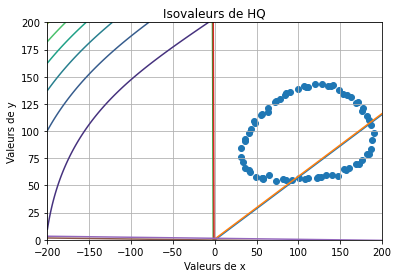